<a href="https://colab.research.google.com/github/anayrshukla/sherlock/blob/master/Stock_ChatBOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai
!pip install textblob
!pip install yfinance
!pip install matplotlib
import requests
import openai
import yfinance as yf
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime, timedelta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
# What needs to be done:
# 1. use openai key given by Mr.Greer
# 2. figure out a way to obtain a news api key
# 3. Write a function to obtain news from the internet using the api key
# 4. Write a basic function that can analyze any random stock trend (use yahoo finance ticker)
# 5. Write a function that can reccomend a stock based on the trend and the news given(this should be done using sentiment analysis with textblob --> I may need a seperate function for this)
# 6. Write a function that lets the user chat with the chatbot and have a conversation
# 7. Make a loop wherein the user can quit with the statement 'Quit' or continue having the conversation

Welcome to the Stock Chatbot. Please enter the stock symbol you want to search: AAPL
1. AAPL stock continues climb to $3T with new trading highs
2. AAPL stock continues climb to $3T with new trading highs
3. AAPL stock continues climb to $3T with record trading highs
4. AAPL stock continues climb to $3T with new trading highs
5. Apple to Announce Q3 2023 Earnings on August 3 Following New Macs
6. AAPL stock touches $3 trillion market cap during trading ahead of historic close
7. Apple、macOS SonomaでPostScript/EPSをPDFへ変換する機能を削除
8. AAPL to $4 Trillion, According to Wedbush
9. In One Chart: Apple Vision Pro: How early adoption could stack up against the iPhone, Apple Watch and iPod
10. APPL $3T valuation isn’t far off – but no thanks to Vision Pro, argues Bloomberg
Enter the number of the article you want to read: 10
Summary: ’s Shira Ovide.

The article is about Apple Inc. and the company’s stock price. The article is about the fact that Apple’s stock price is $100 more than it was a year

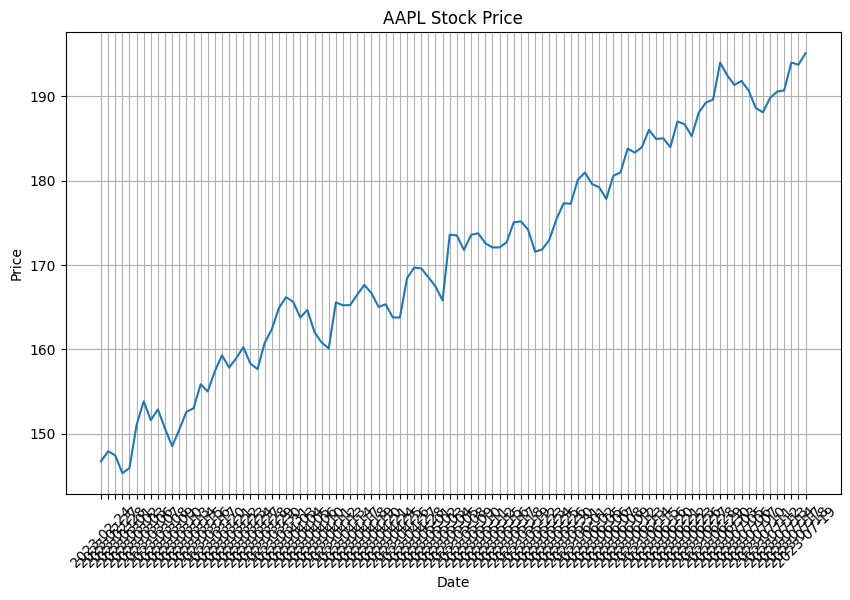

In [6]:

openai.api_key = "###"
alphavantage_key = "###"
newsapi_key = "###"

def fetch_articles(stock_symbol):
    today = datetime.now().strftime("%Y-%m-%d")
    one_month_ago = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
    url = f"https://newsapi.org/v2/everything?q={stock_symbol}&from={one_month_ago}&to={today}&apiKey={newsapi_key}"
    response = requests.get(url)
    articles = response.json()['articles']

    filtered_articles = []
    for article in articles[:10]:
        if article.get('title') and article.get('description') and article.get('url'):
            filtered_articles.append(article)

    return filtered_articles

def select_article(articles):
    for i, article in enumerate(articles):
        print(f"{i + 1}. {article['title']}")

    choice = int(input("Enter the number of the article you want to read: "))
    selected_article = articles[choice - 1]
    return selected_article

def generate_summary(article_text):
    response = openai.Completion.create(
        engine='davinci',
        prompt=f"Summarize the following article in 5 sentences and make sure all information summarized is about the company that the stock relates to. Paragraph Format. The article is: :\n{article_text}",
        max_tokens=100,
        temperature=0.3
    )
    summary = response.choices[0]['text']
    return summary

def perform_sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

def get_stock_data(stock_symbol):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_symbol}&outputsize=compact&apikey={alphavantage_key}"
    response = requests.get(url)
    data = response.json()['Time Series (Daily)']
    return data

def plot_stock_graph(stock_symbol, data):
    dates = []
    prices = []
    for date, values in data.items():
        dates.append(date)
        prices.append(float(values['4. close']))
    dates.reverse()
    prices.reverse()

    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f"{stock_symbol} Stock Price")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def display_stock_info(stock_symbol):
    url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={stock_symbol}&apikey={alphavantage_key}"
    response = requests.get(url)
    info = response.json()

    print("Stock Information:")
    print("Company Name:", info.get('Name', 'N/A'))
    print("Sector:", info.get('Sector', 'N/A'))
    print("Industry:", info.get('Industry', 'N/A'))
    print("Market Cap:", info.get('MarketCapitalization', 'N/A'))
    print("Dividend Yield:", info.get('DividendYield', 'N/A'))
    print("PE Ratio:", info.get('PERatio', 'N/A'))
    print("EPS:", info.get('EPS', 'N/A'))

def main():
    stock_symbol = input("Welcome to the Stock Chatbot. Please enter the stock symbol you want to search: ")
    articles = fetch_articles(stock_symbol)
    selected_article = select_article(articles)
    summary = generate_summary(selected_article['title'])

    print("Summary:", summary)

    sentiment = perform_sentiment_analysis(selected_article['title'])
    if sentiment == 'positive':
        print("Sentiment: Positive")
        print("Recommendation: Buy (Disclaimer: StockBot may not give completely correct recommendations)")
    elif sentiment == 'negative':
        print("Sentiment: Negative")
        print("Recommendation: Sell (Disclaimer: StockBot may not give completely correct recommendations)")
    else:
        print("Sentiment: Neutral")
        print("Recommendation: Hold (Disclaimer: StockBot may not give completely correct recommendations)")

    data = get_stock_data(stock_symbol)
    latest_date = max(data.keys())
    latest_price = float(data[latest_date]['4. close'])
    print("Latest Price:", latest_price)

    display_stock_info(stock_symbol)

    plot_stock_graph(stock_symbol, data)

if __name__ == "__main__":
    main()
